In [1]:
from IPython.display import Image     # Import the Image function from IPython.display to display images in Jupyter environments.
from os import chdir                  # Import chdir from os module to change the current working directory.
from scipy.spatial import Delaunay  # Importar Delaunay
import numpy as np                    # Import numpy library for working with n-dimensional arrays and mathematical operations.
import gudhi as gd                    # Import gudhi library for computational topology and computational geometry.
import matplotlib.pyplot as plt       # Import pyplot from matplotlib for creating visualizations and graphs.
import argparse                       # Import argparse, a standard library for writing user-friendly command-line interfaces.
import seaborn as sns                 # Import seaborn for data visualization; it's based on matplotl.
import requests # Import requests library to make HTTP requests in Python easily.
import pandas as pd
from scipy.spatial.distance import pdist, squareform 
from sklearn.decomposition import PCA
from scipy.spatial import KDTree

In [2]:
#Me ayuda a ver que contiene cada archivo
import pandas as pd
import os

def mostrar_contenido_csv(ruta_directorio):
    archivos_csv = [archivo for archivo in os.listdir(ruta_directorio) if archivo.endswith('.csv')]
    for archivo_csv in archivos_csv:
        ruta_completa = os.path.join(ruta_directorio, archivo_csv)
        df = pd.read_csv(ruta_completa, header=None)
        print(f'Contenido de {archivo_csv}:')
        print(df)
        print("\n" + "="*50 + "\n")


In [3]:
mostrar_contenido_csv("/home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv")


Contenido de -3_0_0.csv:
        0  1    2    3  4
0       2  B  119   82  0
1       4  B  120   82  0
2       4  B  121   82  0
3       4  B  122   82  0
4       4  B  123   82  0
...   ... ..  ...  ... ..
8524  161  A  139  182  0
8525  164  B  140  182  0
8526  164  B  141  182  0
8527  164  B  142  182  0
8528  164  B  143  182  0

[8529 rows x 5 columns]


Contenido de 9_0_0.csv:
        0  1    2    3  4
0      11  A  124   82  0
1       4  B  125   82  0
2       4  B  126   82  0
3       5  A  127   82  0
4       5  A  128   82  0
...   ... ..  ...  ... ..
8107  159  A  122  182  0
8108  159  A  123  182  0
8109  159  A  124  182  0
8110  159  A  125  182  0
8111  163  A  137  182  0

[8112 rows x 5 columns]


Contenido de -1_0_0.csv:
        0  1    2    3  4
0       1  B  115   83  0
1       1  B  116   83  0
2       1  B  117   83  0
3       1  B  118   83  0
4       9  B  119   83  0
...   ... ..  ...  ... ..
8232  160  B  123  182  0
8233  160  B  124  182  0
8234  160  B  

In [46]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def calcular_y_guardar_centroides_separados(ruta_directorio):
    # Crear carpeta para guardar los centroides si no existe
    carpeta_centroides = os.path.join(ruta_directorio, "centroides_tipo")
    if not os.path.exists(carpeta_centroides):
        os.makedirs(carpeta_centroides)

    # Obtener una lista de todos los archivos CSV en la ruta especificada
    archivos_csv = [archivo for archivo in os.listdir(ruta_directorio) if archivo.endswith('.csv')]

    # Iterar sobre cada archivo CSV
    for archivo_csv in archivos_csv:
        # Construir la ruta completa del archivo
        ruta_completa = os.path.join(ruta_directorio, archivo_csv)
        
        # Leer el archivo CSV y asignar nombres de columnas
        df = pd.read_csv(ruta_completa, header=None)
        nombres_columnas = ['id', 'Tipo', 'X', 'Y', 'Z']  # Reemplazar con los nombres de columnas apropiados
        df.columns = nombres_columnas
        
        # Agrupar los datos por el ID y el Tipo
        grupos = df.groupby(['id', 'Tipo'])
        
        # Inicializar diccionarios para almacenar los centroides por tipo
        centroides_por_tipo = {'A': {'x': [], 'y': [], 'id': []},
                               'B': {'x': [], 'y': [], 'id': []}}

        # Calcular el centroide y el tipo para cada grupo
        for (id_grupo, tipo_grupo), grupo in grupos:
            X_grupo = grupo['X']
            Y_grupo = grupo['Y']
            centroid_x_grupo = X_grupo.mean()
            centroid_y_grupo = Y_grupo.mean()
            
            # Guardar los centroides en la lista correspondiente al tipo
            centroides_por_tipo[tipo_grupo]['x'].append(centroid_x_grupo)
            centroides_por_tipo[tipo_grupo]['y'].append(centroid_y_grupo)
            centroides_por_tipo[tipo_grupo]['id'].append(id_grupo)  # Guardar el ID del grupo
        
        # Guardar los centroides de cada tipo en archivos CSV separados
        for tipo, datos in centroides_por_tipo.items():
            if datos['x']:  # Si hay datos para ese tipo
                df_centroides = pd.DataFrame({"centroides_x": datos['x'], "centroides_y": datos['y'], "id": datos['id']})
                
                # Guardar el DataFrame como CSV en la carpeta de centroides
                nombre_archivo_centroides = os.path.splitext(archivo_csv)[0] + f"_{tipo}.csv"
                ruta_archivo_centroides = os.path.join(carpeta_centroides, nombre_archivo_centroides)
                df_centroides.to_csv(ruta_archivo_centroides, index=False)

        # Crear el gráfico de dispersión con centroides rojos y azules
        for tipo in ['A', 'B']:
            color = 'b' if tipo == 'A' else 'r'  # Rojo para tipo 'A', azul para tipo 'B'
            centroides_x_tipo = centroides_por_tipo[tipo]['x']
            centroides_y_tipo = centroides_por_tipo[tipo]['y']
            plt.scatter(centroides_x_tipo, centroides_y_tipo, color=color, label=f'Tipo {tipo}')
        
        plt.xlabel('Coordenada X')
        plt.ylabel('Coordenada Y')
        plt.title(f'Centroides por Tipo ({archivo_csv})')
        plt.legend()
        
        # Guardar la imagen del gráfico en la carpeta de centroides
        ruta_imagen = os.path.join(carpeta_centroides, os.path.splitext(archivo_csv)[0] + "_centroides.png")
        plt.savefig(ruta_imagen)
        plt.close()  # Cerrar el gráfico para no sobrecargar la memoria

        print(f"Centroides y gráfico guardados para {archivo_csv} en {carpeta_centroides}.")

    return carpeta_centroides


In [5]:
# Ejemplo de uso
calcular_y_guardar_centroides_separados("/home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv")

Centroides y gráfico guardados para -3_0_0.csv en /home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides_tipo.
Centroides y gráfico guardados para 9_0_0.csv en /home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides_tipo.
Centroides y gráfico guardados para -1_0_0.csv en /home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides_tipo.
Centroides y gráfico guardados para -5_0_0.csv en /home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides_tipo.
Centroides y gráfico guardados para 3_0_0.csv en /home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides_tipo.
Centroides y gráfico guardados para 5_0_0.csv en /home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides_tipo.
Centroides y gráfico guardados para -9_0_0.csv en /home/jupyter-user5/multicellularity_patterns_classification-/Cor

In [47]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gudhi as gd  # Asegúrate de tener instalada la librería Gudhi

def calcular_rips_y_persistencia(ruta_centroides):
    # Crear la carpeta para guardar los diagramas de persistencia si no existe
    ruta_persistencia = os.path.join(ruta_centroides, "persistencia")
    if not os.path.exists(ruta_persistencia):
        os.makedirs(ruta_persistencia)

    # Obtener una lista de todos los archivos CSV en la ruta especificada
    archivos_csv = [archivo for archivo in os.listdir(ruta_centroides) if archivo.endswith('.csv')]

    # Iterar sobre cada archivo de centroides
    for archivo_csv in archivos_csv:
        # Construir la ruta completa del archivo
        ruta_completa = os.path.join(ruta_centroides, archivo_csv)
        
        # Leer el archivo CSV
        df = pd.read_csv(ruta_completa)
        
        # Extraer las coordenadas de los centroides
        centroides_x = df['centroides_x'].tolist()
        centroides_y = df['centroides_y'].tolist()
        
        # Convertir las coordenadas de los centroides a un formato adecuado para gudhi
        puntos = np.array(list(zip(centroides_x, centroides_y)))

        # Calcular el complejo de Rips con un radio específico
        rips_complex = gd.RipsComplex(points=puntos, max_edge_length=40)
        simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

        # Visualizar el complejo de Rips y el diagrama de persistencia
        plt.figure(figsize=(12, 5))

        # Subplot 1: Complejo de Rips
        plt.subplot(1, 2, 1)
        plt.scatter(centroides_x, centroides_y, color='black', label='Centroides')
        for simplex in simplex_tree.get_skeleton(1):  # Obtener las aristas
            if len(simplex[0]) == 2:  # Asegurarse de que solo sean aristas (simplexes de dimensión 1)
                arista = simplex[0]
                x = [centroides_x[i] for i in arista]
                y = [centroides_y[i] for i in arista]
                plt.plot(x, y, color='gray', linestyle='-', linewidth=1)
        plt.xlabel('Coordenada X')
        plt.ylabel('Coordenada Y')
        plt.title(f'Complejo de Rips ({archivo_csv})')
        plt.legend()

        # Calcular el diagrama de persistencia
        diag = simplex_tree.persistence()

        # Corregir la estructura de los datos de persistencia para el DataFrame
        persistencia_aplanada = []
        for d in diag:
            dimension, (birth, death) = d
            persistencia_aplanada.append([dimension, birth, death])

        # Guardar los datos de persistencia en un DataFrame
        diagram_df = pd.DataFrame(persistencia_aplanada, columns=['dimension', 'birth', 'death'])

        # Filtrar solo para las dimensiones 0 y 1 (si aplica)
        diagram_df = diagram_df[diagram_df['dimension'] <= 1]

        # Guardar el diagrama de persistencia en formato CSV para futuras comparaciones
        nombre_diagrama_csv = f"{os.path.splitext(archivo_csv)[0]}.csv"
        ruta_diagrama_csv = os.path.join(ruta_persistencia, nombre_diagrama_csv)
        diagram_df.to_csv(ruta_diagrama_csv, index=False)

        # Subplot 2: Diagrama de Persistencia
        plt.subplot(1, 2, 2)
        gd.plot_persistence_diagram(diag)
        plt.title(f'Diagrama de Persistencia ({archivo_csv})')
        plt.xlabel('Birth')
        plt.ylabel('Death')

        # Guardar la figura del diagrama en la carpeta de persistencia
        nombre_imagen = f"{os.path.splitext(archivo_csv)[0]}_rips_persistencia.png"
        ruta_imagen = os.path.join(ruta_persistencia, nombre_imagen)
        plt.tight_layout()
        plt.savefig(ruta_imagen)
        plt.close()  # Cerrar el gráfico para no sobrecargar la memoria

        print(f'Gráfico de Rips y diagrama de persistencia guardados para {archivo_csv} en {ruta_persistencia}.')

    return ruta_persistencia

usetex mode requires TeX.


Gráfico de Rips y diagrama de persistencia guardados para -5_0_0_B.csv en /home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides_tipo/persistencia.
Gráfico de Rips y diagrama de persistencia guardados para -9_0_0_A.csv en /home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides_tipo/persistencia.
Gráfico de Rips y diagrama de persistencia guardados para -1_0_0_B.csv en /home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides_tipo/persistencia.
Gráfico de Rips y diagrama de persistencia guardados para 7_0_0_B.csv en /home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides_tipo/persistencia.
Gráfico de Rips y diagrama de persistencia guardados para 9_0_0_A.csv en /home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides_tipo/persistencia.
Gráfico de Rips y diagrama de persistencia guardados para 7_0_0_A.csv en /hom

/opt/conda/envs/TDA/lib/python3.7/site-packages/gudhi/persistence_graphical_tools.py:306: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, axes = plt.subplots(1, 1)


Gráfico de Rips y diagrama de persistencia guardados para -3_0_0_A.csv en /home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides_tipo/persistencia.


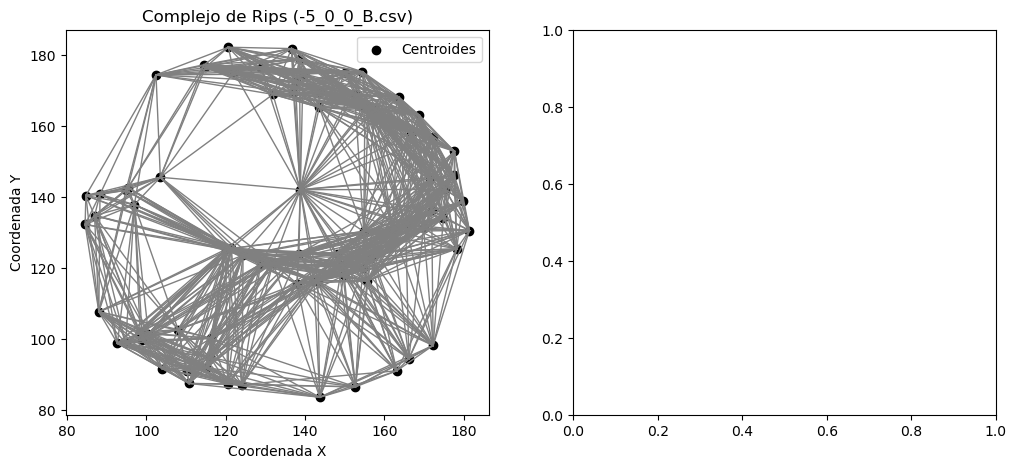

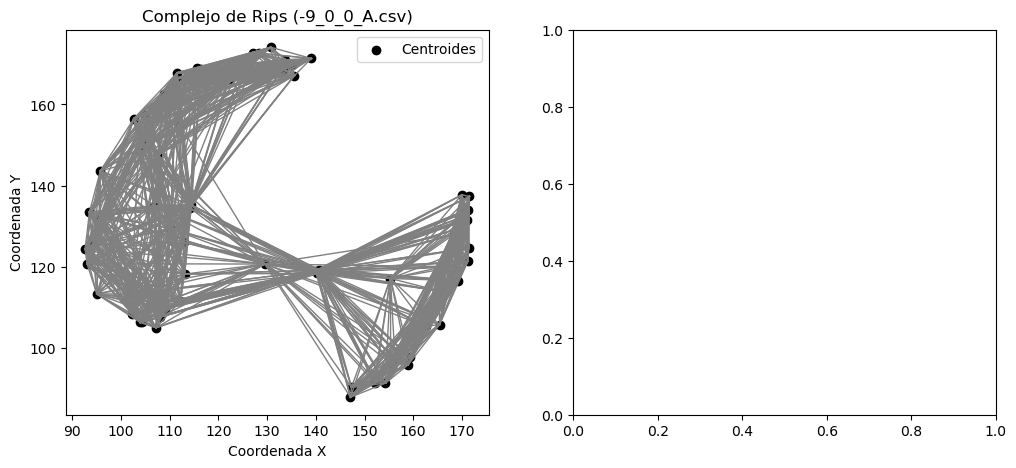

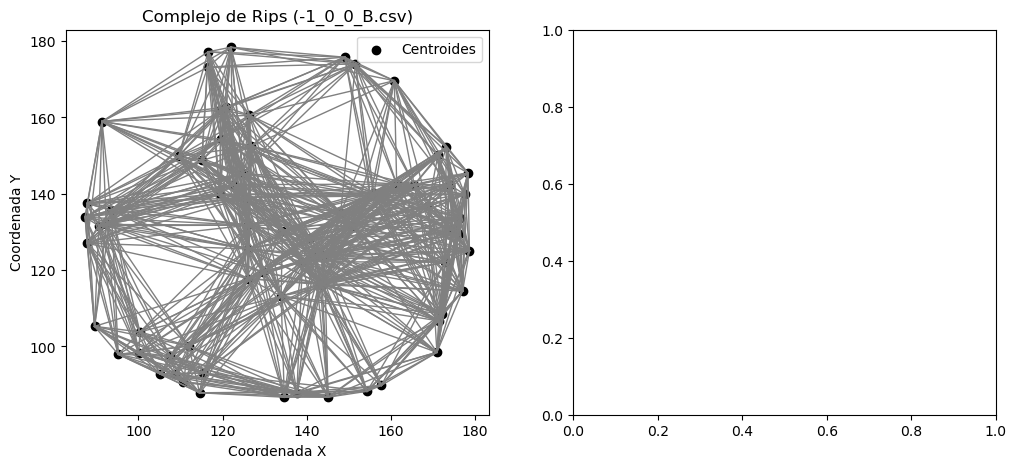

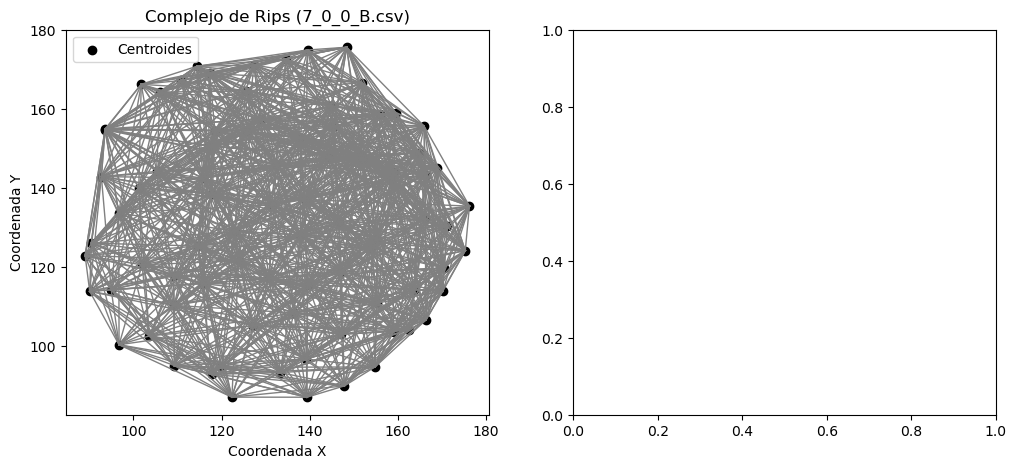

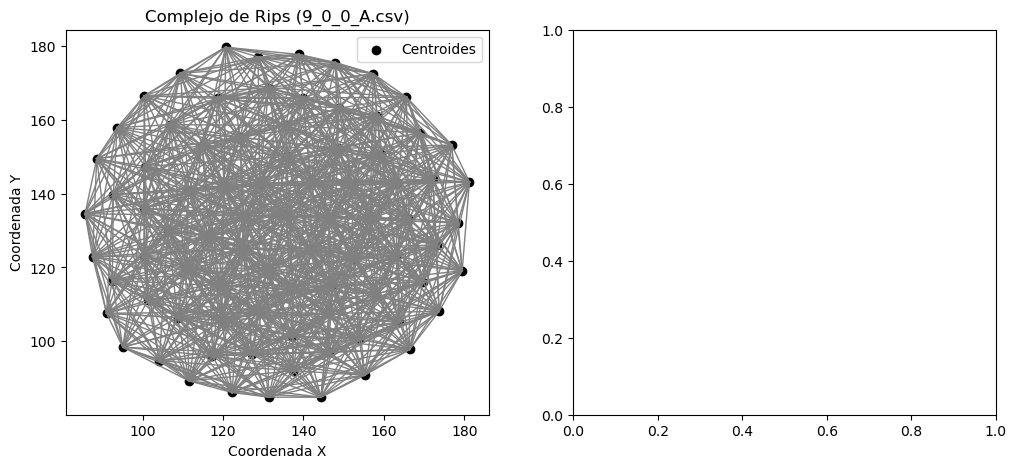

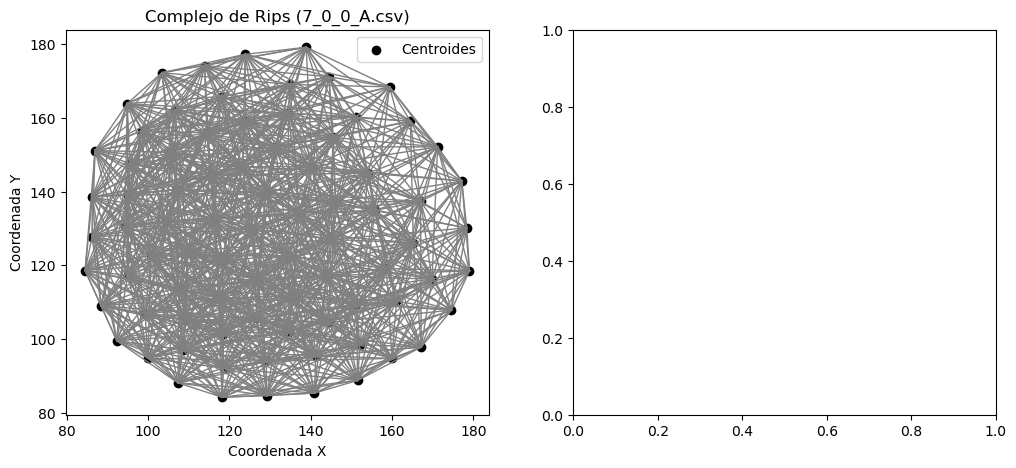

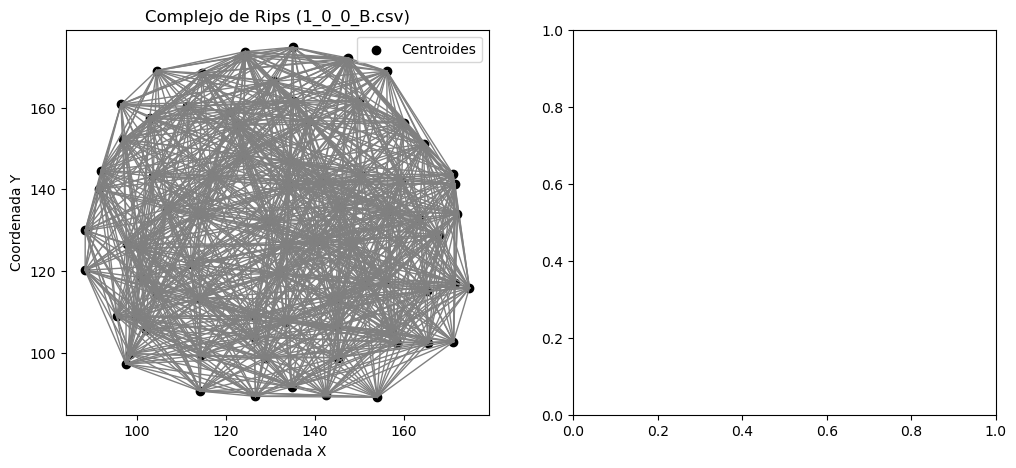

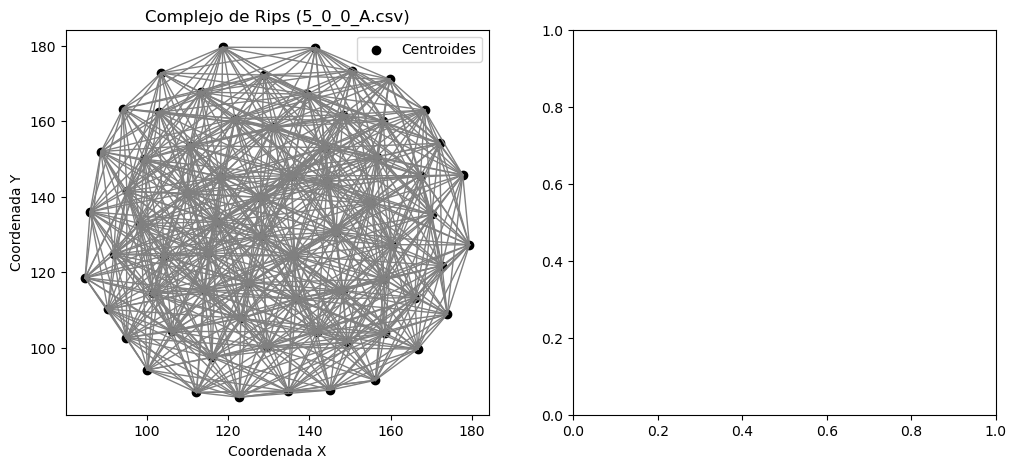

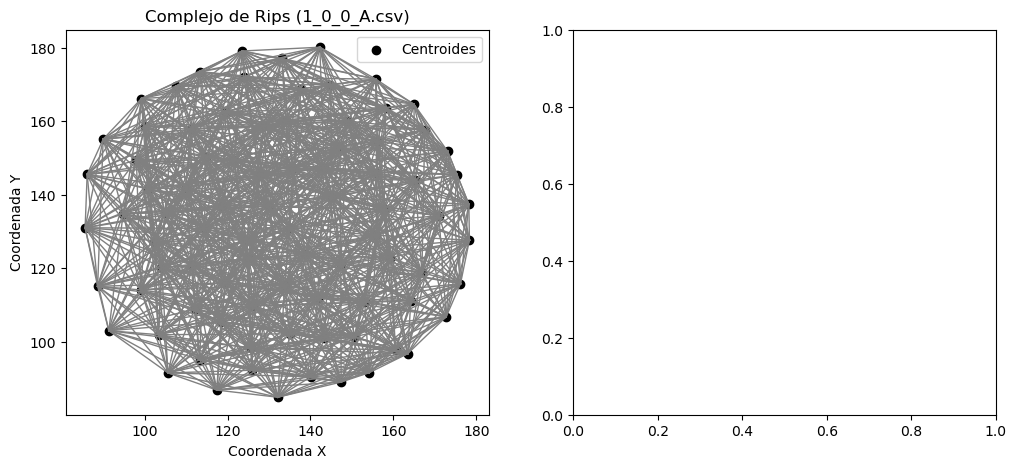

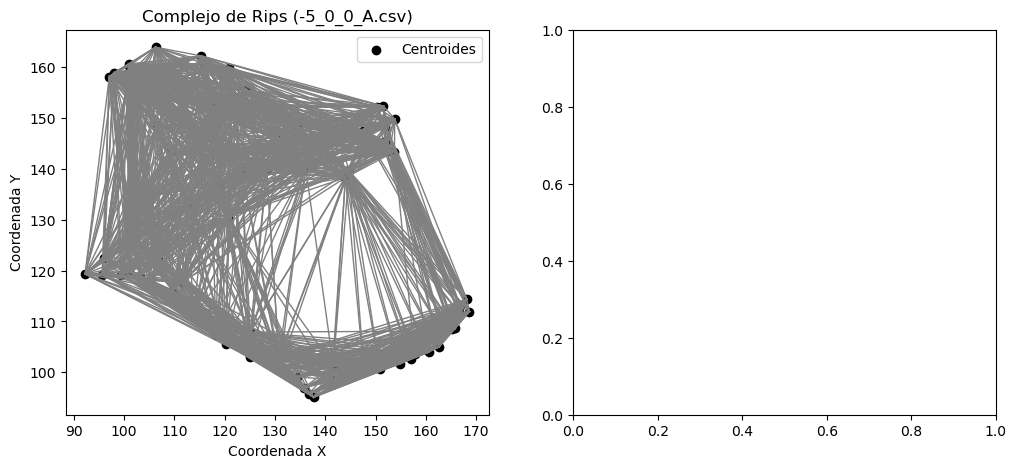

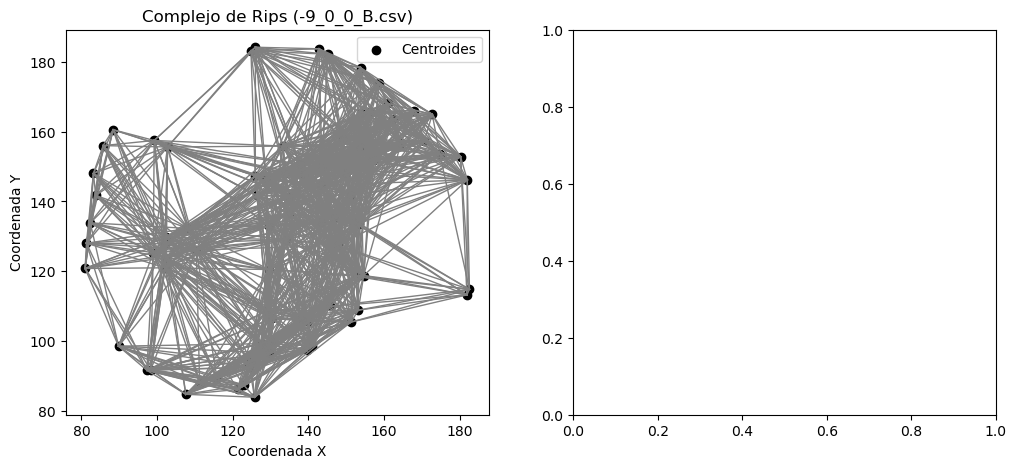

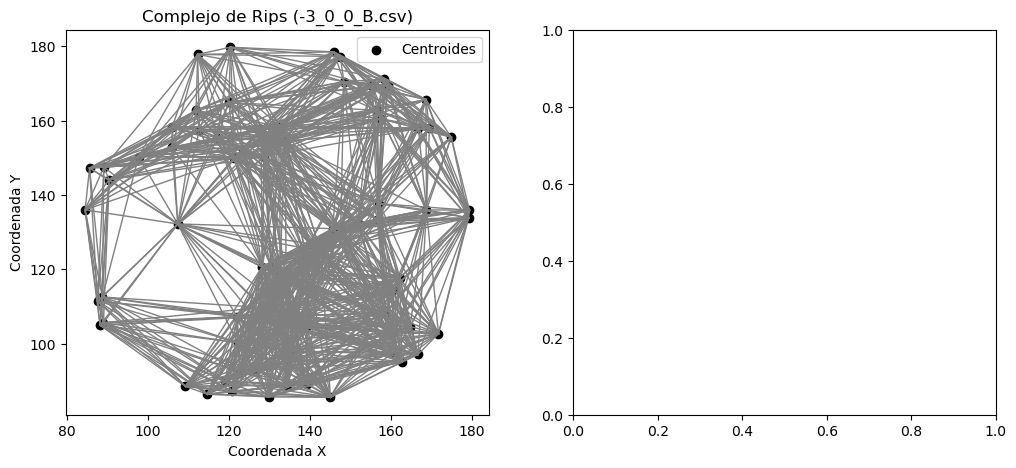

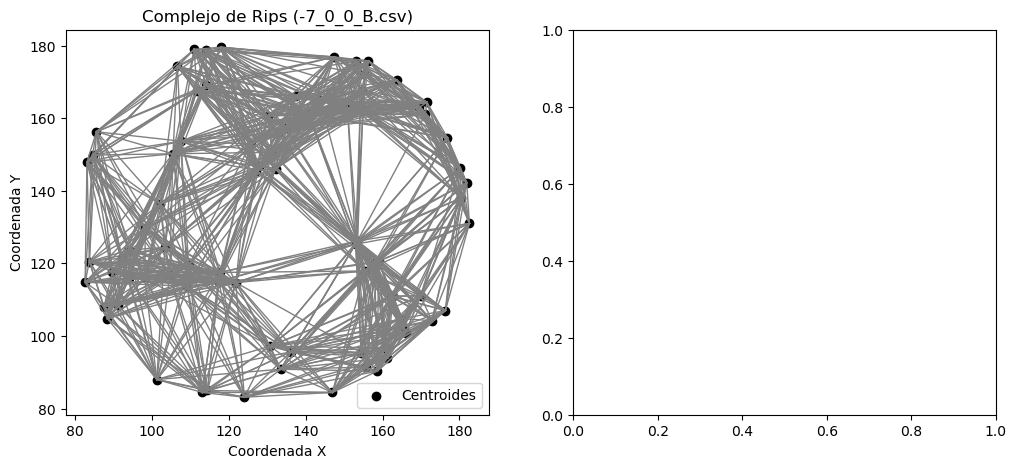

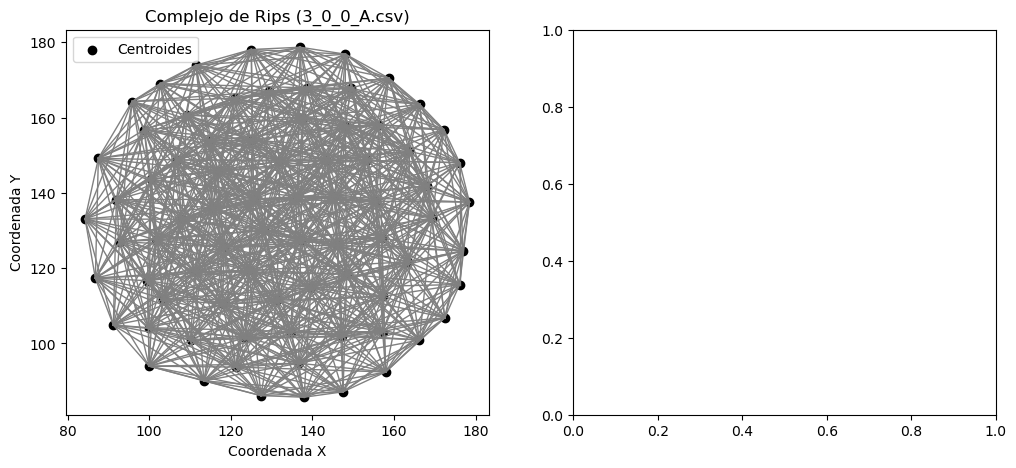

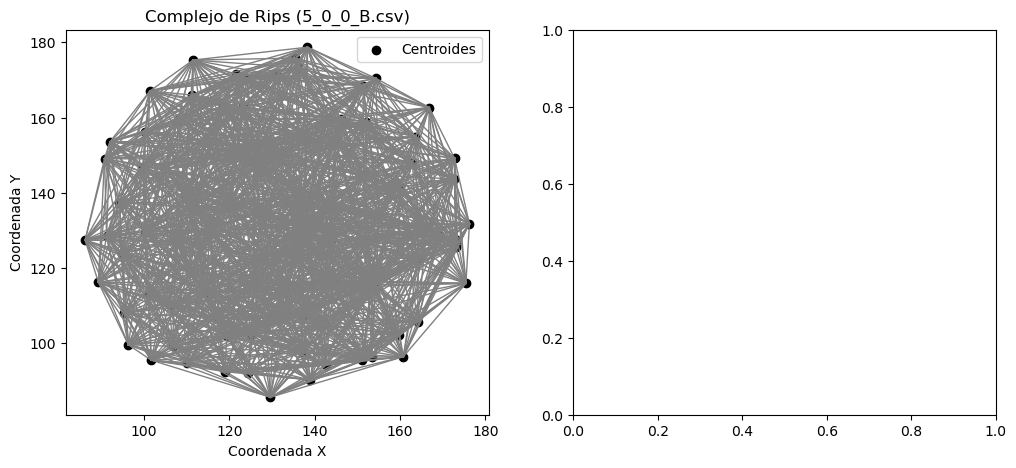

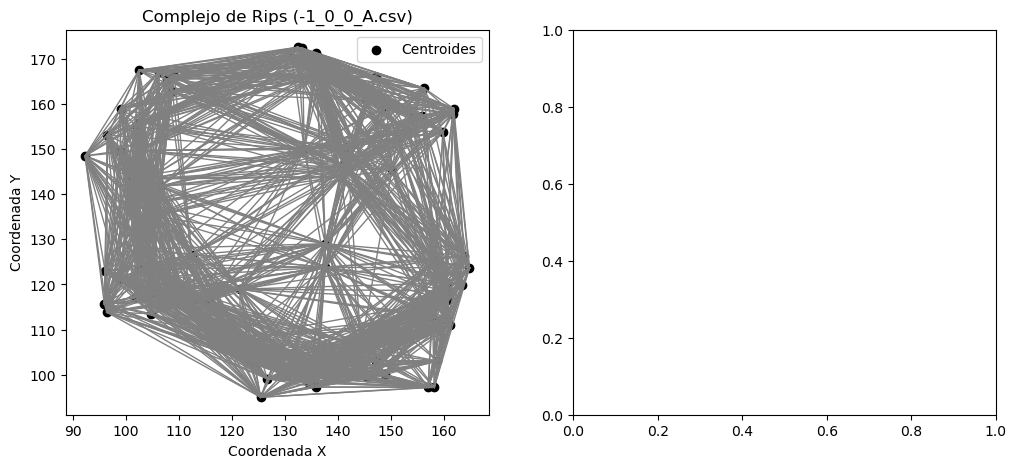

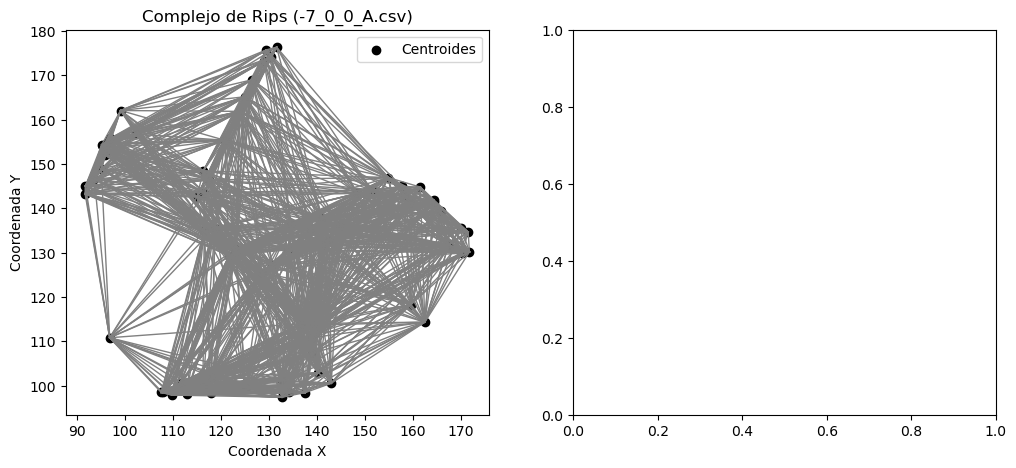

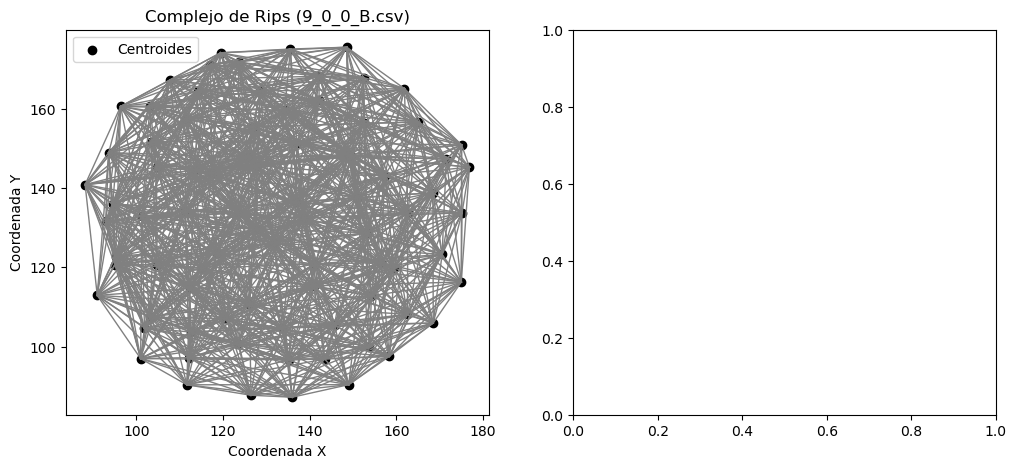

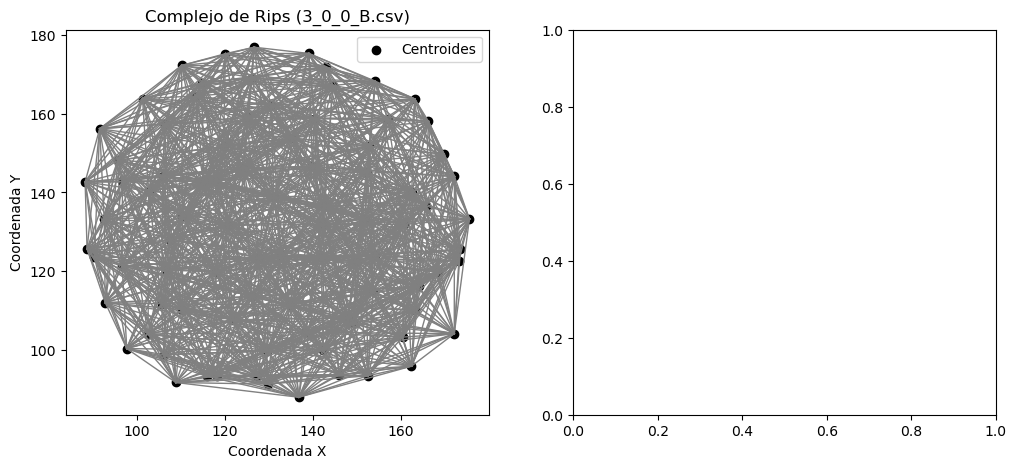

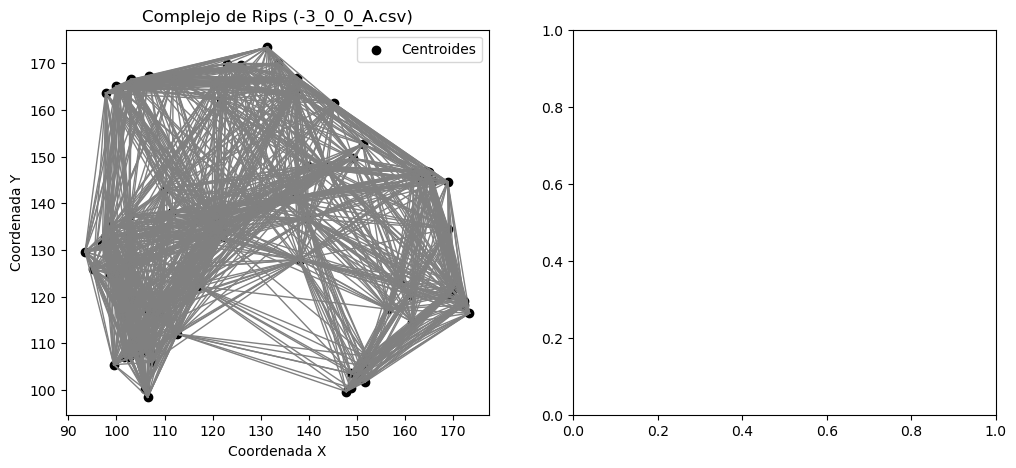

In [7]:
calcular_rips_y_persistencia("/home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides_tipo/")

In [15]:
# import os
# import pandas as pd
# import numpy as np
# import gudhi as gd

# def calcular_distancia_bottleneck(ruta_directorio):
#     # Crear la carpeta de salida
#     carpeta_salida = os.path.join(ruta_directorio, "distancia de cuello de botella")
#     os.makedirs(carpeta_salida, exist_ok=True)

#     # Almacenar los diagramas de persistencia
#     diagramas_persistencia = {}
#     diagramas_persistencia_0 = {}

#     # Listar todos los archivos CSV en el directorio
#     archivos_csv = [f for f in os.listdir(ruta_directorio) if f.endswith('.csv')]

#     # Iterar sobre cada archivo CSV
#     for archivo_csv in archivos_csv:
#         try:
#             # Construir la ruta completa del archivo
#             ruta_completa = os.path.join(ruta_directorio, archivo_csv)
            
#             # Leer el archivo CSV y asignar nombres de columnas
#             df = pd.read_csv(ruta_completa, header=0)  # Usar la primera fila como cabecera
            
#             # Asegúrate de que el DataFrame tenga las columnas correctas
#             if 'birth' not in df.columns or 'death' not in df.columns:
#                 print(f"El archivo {archivo_csv} no contiene las columnas 'birth' o 'death'.")
#                 continue
            
#             # Convertir columnas 'birth' y 'death' a flotantes
#             df['birth'] = df['birth'].astype(float)
#             df['death'] = df['death'].astype(float)

#             # Almacenar el diagrama de persistencia en dimensión 1
#             diag_1 = df[df['dimension'] == 1][['birth', 'death']].to_numpy()
#             diagramas_persistencia[archivo_csv] = diag_1
            
#             # Almacenar el diagrama de persistencia en dimensión 0
#             diag_0 = df[df['dimension'] == 0][['birth', 'death']].to_numpy()
#             diagramas_persistencia_0[archivo_csv] = diag_0
            
#         except Exception as e:
#             print(f"Error al procesar el archivo {archivo_csv}: {e}")

#     # Calcular las distancias de Bottleneck entre todos los pares de diagramas de persistencia
#     archivos = list(diagramas_persistencia.keys())
#     n = len(archivos)
#     tolerancia = 1e-10  # Tolerancia para considerar distancias efectivamente como cero

#     # Inicializar matrices de distancias
#     distancias_dim1 = np.zeros((n, n))
#     distancias_dim0 = np.zeros((n, n))

#     for i in range(n):
#         for j in range(i, n):
#             archivo_i = archivos[i]
#             archivo_j = archivos[j]
#             diag_i = diagramas_persistencia[archivo_i]
#             diag_j = diagramas_persistencia[archivo_j]
#             diag_i_0 = diagramas_persistencia_0[archivo_i]
#             diag_j_0 = diagramas_persistencia_0[archivo_j]
            
#             # Calcular distancias de Bottleneck
#             distancia_bottleneck = gd.bottleneck_distance(diag_i, diag_j)
#             distancia_bottleneck_0 = gd.bottleneck_distance(diag_i_0, diag_j_0)
            
#             distancias_dim1[i, j] = distancia_bottleneck
#             distancias_dim1[j, i] = distancia_bottleneck
#             distancias_dim0[i, j] = distancia_bottleneck_0
#             distancias_dim0[j, i] = distancia_bottleneck_0
            
#             # Verificar que la distancia de Bottleneck para el mismo archivo es efectivamente cero
#             if i == j:
#                 if distancia_bottleneck < tolerancia:
#                     print(f"Distancia de Bottleneck (Dimensión 1) para {archivo_i} es efectivamente cero.")
#                 else:
#                     print(f"Distancia de Bottleneck (Dimensión 1) para {archivo_i} no es cero: {distancia_bottleneck}")
                
#                 if distancia_bottleneck_0 < tolerancia:
#                     print(f"Distancia de Bottleneck (Dimensión 0) para {archivo_i} es efectivamente cero.")
#                 else:
#                     print(f"Distancia de Bottleneck (Dimensión 0) para {archivo_i} no es cero: {distancia_bottleneck_0}")

#     # Guardar las matrices de distancias en CSV
#     pd.DataFrame(distancias_dim1, index=archivos, columns=archivos).to_csv(os.path.join(carpeta_salida, 'distancias_bottleneck_dim1.csv'))
#     pd.DataFrame(distancias_dim0, index=archivos, columns=archivos).to_csv(os.path.join(carpeta_salida, 'distancias_bottleneck_dim0.csv'))


In [16]:
# calcular_distancia_bottleneck("/home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides_tipo/persistencia/")
#

In [19]:
import os
import pandas as pd
import numpy as np
import gudhi as gd

def calcular_distancia_bottleneck(ruta_directorio):
    # Crear la carpeta de salida
    carpeta_salida = os.path.join(ruta_directorio, "distancia_bottleneck")
    os.makedirs(carpeta_salida, exist_ok=True)

    # Almacenar los diagramas de persistencia por tipo
    diagramas_persistencia_A = {}
    diagramas_persistencia_B = {}
    diagramas_persistencia_A_0 = {}
    diagramas_persistencia_B_0 = {}

    # Listar todos los archivos CSV en el directorio
    archivos_csv = [f for f in os.listdir(ruta_directorio) if f.endswith('.csv')]

    # Iterar sobre cada archivo CSV
    for archivo_csv in archivos_csv:
        try:
            # Construir la ruta completa del archivo
            ruta_completa = os.path.join(ruta_directorio, archivo_csv)
            
            # Leer el archivo CSV y asignar nombres de columnas
            df = pd.read_csv(ruta_completa, header=0)  # Usar la primera fila como cabecera
            
            # Asegúrate de que el DataFrame tenga las columnas correctas
            if 'birth' not in df.columns or 'death' not in df.columns:
                print(f"El archivo {archivo_csv} no contiene las columnas 'birth' o 'death'.")
                continue
            
            # Convertir columnas 'birth' y 'death' a flotantes
            df['birth'] = df['birth'].astype(float)
            df['death'] = df['death'].astype(float)

            # Almacenar el diagrama de persistencia en dimensión 1 y 0
            diag_1 = df[df['dimension'] == 1][['birth', 'death']].to_numpy()
            diag_0 = df[df['dimension'] == 0][['birth', 'death']].to_numpy()

            # Asignar el diagrama al grupo correspondiente (A o B)
            if '_A' in archivo_csv:
                diagramas_persistencia_A[archivo_csv] = diag_1
                diagramas_persistencia_A_0[archivo_csv] = diag_0
            elif '_B' in archivo_csv:
                diagramas_persistencia_B[archivo_csv] = diag_1
                diagramas_persistencia_B_0[archivo_csv] = diag_0
                
        except Exception as e:
            print(f"Error al procesar el archivo {archivo_csv}: {e}")

    # Función para calcular distancias de Bottleneck
    def calcular_distancias(diagramas, diagramas_0, nombre_tipo):
        archivos = list(diagramas.keys())
        n = len(archivos)
        tolerancia = 1e-10  # Tolerancia para considerar distancias efectivamente como cero

        # Inicializar matrices de distancias
        distancias_dim1 = np.zeros((n, n))
        distancias_dim0 = np.zeros((n, n))

        for i in range(n):
            for j in range(i, n):
                archivo_i = archivos[i]
                archivo_j = archivos[j]
                diag_i = diagramas[archivo_i]
                diag_j = diagramas[archivo_j]
                diag_i_0 = diagramas_0[archivo_i]
                diag_j_0 = diagramas_0[archivo_j]

                # Calcular distancias de Bottleneck
                distancia_bottleneck = gd.bottleneck_distance(diag_i, diag_j)
                distancia_bottleneck_0 = gd.bottleneck_distance(diag_i_0, diag_j_0)

                distancias_dim1[i, j] = distancia_bottleneck
                distancias_dim1[j, i] = distancia_bottleneck
                distancias_dim0[i, j] = distancia_bottleneck_0
                distancias_dim0[j, i] = distancia_bottleneck_0

                # Verificar que la distancia de Bottleneck para el mismo archivo es efectivamente cero
                if i == j:
                    if distancia_bottleneck < tolerancia:
                        print(f"Distancia de Bottleneck (Dimensión 1) para {archivo_i} ({nombre_tipo}) es efectivamente cero.")
                    else:
                        print(f"Distancia de Bottleneck (Dimensión 1) para {archivo_i} ({nombre_tipo}) no es cero: {distancia_bottleneck}")

                    if distancia_bottleneck_0 < tolerancia:
                        print(f"Distancia de Bottleneck (Dimensión 0) para {archivo_i} ({nombre_tipo}) es efectivamente cero.")
                    else:
                        print(f"Distancia de Bottleneck (Dimensión 0) para {archivo_i} ({nombre_tipo}) no es cero: {distancia_bottleneck_0}")

        # Guardar las matrices de distancias en CSV por tipo
        pd.DataFrame(distancias_dim1, index=archivos, columns=archivos).to_csv(os.path.join(carpeta_salida, f'distancias_bottleneck_dim1_{nombre_tipo}.csv'))
        pd.DataFrame(distancias_dim0, index=archivos, columns=archivos).to_csv(os.path.join(carpeta_salida, f'distancias_bottleneck_dim0_{nombre_tipo}.csv'))

    # Calcular distancias para Tipo A
    if diagramas_persistencia_A:
        print("Calculando distancias para Tipo A...")
        calcular_distancias(diagramas_persistencia_A, diagramas_persistencia_A_0, 'A')

    # Calcular distancias para Tipo B
    if diagramas_persistencia_B:
        print("Calculando distancias para Tipo B...")
        calcular_distancias(diagramas_persistencia_B, diagramas_persistencia_B_0, 'B')

In [20]:
# Ejemplo de uso
calcular_distancia_bottleneck("/home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides_tipo/persistencia/")


Calculando distancias para Tipo A...
Distancia de Bottleneck (Dimensión 1) para -9_0_0_A.csv (A) es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para -9_0_0_A.csv (A) es efectivamente cero.
Distancia de Bottleneck (Dimensión 1) para 9_0_0_A.csv (A) es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para 9_0_0_A.csv (A) es efectivamente cero.
Distancia de Bottleneck (Dimensión 1) para 7_0_0_A.csv (A) es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para 7_0_0_A.csv (A) es efectivamente cero.
Distancia de Bottleneck (Dimensión 1) para 5_0_0_A.csv (A) es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para 5_0_0_A.csv (A) es efectivamente cero.
Distancia de Bottleneck (Dimensión 1) para 1_0_0_A.csv (A) es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para 1_0_0_A.csv (A) es efectivamente cero.
Distancia de Bottleneck (Dimensión 1) para -5_0_0_A.csv (A) es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para -5_0_0_A.csv (A

In [22]:
import os
import pandas as pd
import numpy as np
import gudhi as gd
import gudhi.wasserstein as gw

def distancia_wasserstein(ruta_directorio):
    # Crear la carpeta de salida
    carpeta_salida = os.path.join(ruta_directorio, "distancia_wasserstein")
    os.makedirs(carpeta_salida, exist_ok=True)

    # Almacenar los diagramas de persistencia por tipo
    diagramas_persistencia_A = {}
    diagramas_persistencia_B = {}
    diagramas_persistencia_A_0 = {}
    diagramas_persistencia_B_0 = {}

    # Listar todos los archivos CSV en el directorio
    archivos_csv = [f for f in os.listdir(ruta_directorio) if f.endswith('.csv')]

    # Iterar sobre cada archivo CSV
    for archivo_csv in archivos_csv:
        try:
            # Construir la ruta completa del archivo
            ruta_completa = os.path.join(ruta_directorio, archivo_csv)
            
            # Leer el archivo CSV y asignar nombres de columnas
            df = pd.read_csv(ruta_completa, header=0)  # Usar la primera fila como cabecera
            
            # Asegúrate de que el DataFrame tenga las columnas correctas
            if 'birth' not in df.columns or 'death' not in df.columns:
                print(f"El archivo {archivo_csv} no contiene las columnas 'birth' o 'death'.")
                continue
            
            # Convertir columnas 'birth' y 'death' a flotantes
            df['birth'] = df['birth'].astype(float)
            df['death'] = df['death'].astype(float)

            # Almacenar el diagrama de persistencia en dimensión 1 y 0
            diag_1 = df[df['dimension'] == 1][['birth', 'death']].to_numpy()
            diag_0 = df[df['dimension'] == 0][['birth', 'death']].to_numpy()

            # Asignar el diagrama al grupo correspondiente (A o B)
            if '_A' in archivo_csv:
                diagramas_persistencia_A[archivo_csv] = diag_1
                diagramas_persistencia_A_0[archivo_csv] = diag_0
            elif '_B' in archivo_csv:
                diagramas_persistencia_B[archivo_csv] = diag_1
                diagramas_persistencia_B_0[archivo_csv] = diag_0
                
        except Exception as e:
            print(f"Error al procesar el archivo {archivo_csv}: {e}")

    # Función para calcular distancias de Wasserstein
    def calcular_distancias(diagramas, diagramas_0, nombre_tipo):
        archivos = list(diagramas.keys())
        n = len(archivos)
        tolerancia = 1e-10  # Tolerancia para considerar distancias efectivamente como cero

        # Inicializar matrices de distancias
        distancias_dim1 = np.zeros((n, n))
        distancias_dim0 = np.zeros((n, n))

        for i in range(n):
            for j in range(i, n):
                archivo_i = archivos[i]
                archivo_j = archivos[j]
                diag_i = diagramas[archivo_i]
                diag_j = diagramas[archivo_j]
                diag_i_0 = diagramas_0[archivo_i]
                diag_j_0 = diagramas_0[archivo_j]

                # Calcular distancias de Wasserstein
                distancia_wasserstein = gw.wasserstein_distance(diag_i, diag_j, order=1)
                distancia_wasserstein_0 = gw.wasserstein_distance(diag_i_0, diag_j_0, order=1)

                distancias_dim1[i, j] = distancia_wasserstein
                distancias_dim1[j, i] = distancia_wasserstein
                distancias_dim0[i, j] = distancia_wasserstein_0
                distancias_dim0[j, i] = distancia_wasserstein_0

                # Verificar que la distancia de Wasserstein para el mismo archivo es efectivamente cero
                if i == j:
                    if distancia_wasserstein < tolerancia:
                        print(f"Distancia de Wasserstein (Dimensión 1) para {archivo_i} ({nombre_tipo}) es efectivamente cero.")
                    else:
                        print(f"Distancia de Wasserstein (Dimensión 1) para {archivo_i} ({nombre_tipo}) no es cero: {distancia_wasserstein}")

                    if distancia_wasserstein_0 < tolerancia:
                        print(f"Distancia de Wasserstein (Dimensión 0) para {archivo_i} ({nombre_tipo}) es efectivamente cero.")
                    else:
                        print(f"Distancia de Wasserstein (Dimensión 0) para {archivo_i} ({nombre_tipo}) no es cero: {distancia_wasserstein_0}")

        # Guardar las matrices de distancias en CSV por tipo
        pd.DataFrame(distancias_dim1, index=archivos, columns=archivos).to_csv(os.path.join(carpeta_salida, f'distancias_wasserstein_dim1_{nombre_tipo}.csv'))
        pd.DataFrame(distancias_dim0, index=archivos, columns=archivos).to_csv(os.path.join(carpeta_salida, f'distancias_wasserstein_dim0_{nombre_tipo}.csv'))

    # Calcular distancias para Tipo A
    if diagramas_persistencia_A:
        print("Calculando distancias para Tipo A...")
        calcular_distancias(diagramas_persistencia_A, diagramas_persistencia_A_0, 'A')

    # Calcular distancias para Tipo B
    if diagramas_persistencia_B:
        print("Calculando distancias para Tipo B...")
        calcular_distancias(diagramas_persistencia_B, diagramas_persistencia_B_0, 'B')


In [23]:
# Ejemplo de uso
distancia_wasserstein("/home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides_tipo/persistencia/")


Calculando distancias para Tipo A...
Distancia de Wasserstein (Dimensión 1) para -9_0_0_A.csv (A) es efectivamente cero.
Distancia de Wasserstein (Dimensión 0) para -9_0_0_A.csv (A) es efectivamente cero.
Distancia de Wasserstein (Dimensión 1) para 9_0_0_A.csv (A) es efectivamente cero.
Distancia de Wasserstein (Dimensión 0) para 9_0_0_A.csv (A) es efectivamente cero.
Distancia de Wasserstein (Dimensión 1) para 7_0_0_A.csv (A) es efectivamente cero.
Distancia de Wasserstein (Dimensión 0) para 7_0_0_A.csv (A) es efectivamente cero.
Distancia de Wasserstein (Dimensión 1) para 5_0_0_A.csv (A) es efectivamente cero.
Distancia de Wasserstein (Dimensión 0) para 5_0_0_A.csv (A) es efectivamente cero.
Distancia de Wasserstein (Dimensión 1) para 1_0_0_A.csv (A) es efectivamente cero.
Distancia de Wasserstein (Dimensión 0) para 1_0_0_A.csv (A) es efectivamente cero.
Distancia de Wasserstein (Dimensión 1) para -5_0_0_A.csv (A) es efectivamente cero.
Distancia de Wasserstein (Dimensión 0) para -5_

In [24]:
import os
import pandas as pd
import numpy as np
import gudhi as gd
import gudhi.wasserstein as gw

def distancias_por_tipo(ruta_directorio):
    # Crear la carpeta de salida
    carpeta_salida = os.path.join(ruta_directorio, "distancias_por_tipo")
    os.makedirs(carpeta_salida, exist_ok=True)

    # Almacenar los diagramas de persistencia por tipo
    diagramas_persistencia_A = {}
    diagramas_persistencia_B = {}
    diagramas_persistencia_A_0 = {}
    diagramas_persistencia_B_0 = {}

    # Listar todos los archivos CSV en el directorio
    archivos_csv = [f for f in os.listdir(ruta_directorio) if f.endswith('.csv')]

    # Iterar sobre cada archivo CSV
    for archivo_csv in archivos_csv:
        try:
            # Construir la ruta completa del archivo
            ruta_completa = os.path.join(ruta_directorio, archivo_csv)
            
            # Leer el archivo CSV y asignar nombres de columnas
            df = pd.read_csv(ruta_completa, header=0)  # Usar la primera fila como cabecera
            
            # Asegúrate de que el DataFrame tenga las columnas correctas
            if 'birth' not in df.columns or 'death' not in df.columns:
                print(f"El archivo {archivo_csv} no contiene las columnas 'birth' o 'death'.")
                continue
            
            # Convertir columnas 'birth' y 'death' a flotantes
            df['birth'] = df['birth'].astype(float)
            df['death'] = df['death'].astype(float)

            # Almacenar el diagrama de persistencia en dimensión 1 y 0
            diag_1 = df[df['dimension'] == 1][['birth', 'death']].to_numpy()
            diag_0 = df[df['dimension'] == 0][['birth', 'death']].to_numpy()

            # Asignar el diagrama al grupo correspondiente (A o B)
            if '_A' in archivo_csv:
                diagramas_persistencia_A[archivo_csv] = diag_1
                diagramas_persistencia_A_0[archivo_csv] = diag_0
            elif '_B' in archivo_csv:
                diagramas_persistencia_B[archivo_csv] = diag_1
                diagramas_persistencia_B_0[archivo_csv] = diag_0
                
        except Exception as e:
            print(f"Error al procesar el archivo {archivo_csv}: {e}")

    # Función para calcular distancias de Bottleneck y Wasserstein
    def calcular_distancias(diagramas, diagramas_0, nombre_tipo):
        archivos = list(diagramas.keys())
        n = len(archivos)
        tolerancia = 1e-10  # Tolerancia para considerar distancias efectivamente como cero

        # Inicializar matrices de distancias
        distancias_bottleneck_dim1 = np.zeros((n, n))
        distancias_bottleneck_dim0 = np.zeros((n, n))
        distancias_wasserstein_dim1 = np.zeros((n, n))
        distancias_wasserstein_dim0 = np.zeros((n, n))

        for i in range(n):
            for j in range(i, n):
                archivo_i = archivos[i]
                archivo_j = archivos[j]
                diag_i = diagramas[archivo_i]
                diag_j = diagramas[archivo_j]
                diag_i_0 = diagramas_0[archivo_i]
                diag_j_0 = diagramas_0[archivo_j]

                # Calcular distancias de Bottleneck
                distancia_bottleneck = gd.bottleneck_distance(diag_i, diag_j)
                distancia_bottleneck_0 = gd.bottleneck_distance(diag_i_0, diag_j_0)

                # Calcular distancias de Wasserstein
                distancia_wasserstein = gw.wasserstein_distance(diag_i, diag_j, order=1)
                distancia_wasserstein_0 = gw.wasserstein_distance(diag_i_0, diag_j_0, order=1)

                # Almacenar las distancias en las matrices
                distancias_bottleneck_dim1[i, j] = distancias_bottleneck_dim1[j, i] = distancia_bottleneck
                distancias_bottleneck_dim0[i, j] = distancias_bottleneck_dim0[j, i] = distancia_bottleneck_0
                distancias_wasserstein_dim1[i, j] = distancias_wasserstein_dim1[j, i] = distancia_wasserstein
                distancias_wasserstein_dim0[i, j] = distancias_wasserstein_dim0[j, i] = distancia_wasserstein_0

                # Verificar que las distancias para el mismo archivo son efectivamente cero
                if i == j:
                    if distancia_bottleneck < tolerancia and distancia_wasserstein < tolerancia:
                        print(f"Distancias (Dimensión 1) para {archivo_i} ({nombre_tipo}) son efectivamente cero.")
                    else:
                        print(f"Distancias (Dimensión 1) para {archivo_i} ({nombre_tipo}) no son cero: Bottleneck = {distancia_bottleneck}, Wasserstein = {distancia_wasserstein}")

                    if distancia_bottleneck_0 < tolerancia and distancia_wasserstein_0 < tolerancia:
                        print(f"Distancias (Dimensión 0) para {archivo_i} ({nombre_tipo}) son efectivamente cero.")
                    else:
                        print(f"Distancias (Dimensión 0) para {archivo_i} ({nombre_tipo}) no son cero: Bottleneck = {distancia_bottleneck_0}, Wasserstein = {distancia_wasserstein_0}")

        # Guardar las matrices de distancias en CSV por tipo
        pd.DataFrame(distancias_bottleneck_dim1, index=archivos, columns=archivos).to_csv(os.path.join(carpeta_salida, f'distancias_bottleneck_dim1_{nombre_tipo}.csv'))
        pd.DataFrame(distancias_bottleneck_dim0, index=archivos, columns=archivos).to_csv(os.path.join(carpeta_salida, f'distancias_bottleneck_dim0_{nombre_tipo}.csv'))
        pd.DataFrame(distancias_wasserstein_dim1, index=archivos, columns=archivos).to_csv(os.path.join(carpeta_salida, f'distancias_wasserstein_dim1_{nombre_tipo}.csv'))
        pd.DataFrame(distancias_wasserstein_dim0, index=archivos, columns=archivos).to_csv(os.path.join(carpeta_salida, f'distancias_wasserstein_dim0_{nombre_tipo}.csv'))

    # Calcular distancias para Tipo A
    if diagramas_persistencia_A:
        print("Calculando distancias para Tipo A...")
        calcular_distancias(diagramas_persistencia_A, diagramas_persistencia_A_0, 'A')

    # Calcular distancias para Tipo B
    if diagramas_persistencia_B:
        print("Calculando distancias para Tipo B...")
        calcular_distancias(diagramas_persistencia_B, diagramas_persistencia_B_0, 'B')


In [26]:
# Ejemplo de uso
distancias_por_tipo("/home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides_tipo/persistencia/")


Calculando distancias para Tipo A...
Distancias (Dimensión 1) para -9_0_0_A.csv (A) son efectivamente cero.
Distancias (Dimensión 0) para -9_0_0_A.csv (A) son efectivamente cero.
Distancias (Dimensión 1) para 9_0_0_A.csv (A) son efectivamente cero.
Distancias (Dimensión 0) para 9_0_0_A.csv (A) son efectivamente cero.
Distancias (Dimensión 1) para 7_0_0_A.csv (A) son efectivamente cero.
Distancias (Dimensión 0) para 7_0_0_A.csv (A) son efectivamente cero.
Distancias (Dimensión 1) para 5_0_0_A.csv (A) son efectivamente cero.
Distancias (Dimensión 0) para 5_0_0_A.csv (A) son efectivamente cero.
Distancias (Dimensión 1) para 1_0_0_A.csv (A) son efectivamente cero.
Distancias (Dimensión 0) para 1_0_0_A.csv (A) son efectivamente cero.
Distancias (Dimensión 1) para -5_0_0_A.csv (A) son efectivamente cero.
Distancias (Dimensión 0) para -5_0_0_A.csv (A) son efectivamente cero.
Distancias (Dimensión 1) para 3_0_0_A.csv (A) son efectivamente cero.
Distancias (Dimensión 0) para 3_0_0_A.csv (A) son

In [39]:
import os
import pandas as pd

def sumar_distancias(ruta_directorio):
    # Listar todos los archivos CSV en el directorio
    archivos_csv = [f for f in os.listdir(ruta_directorio) if f.endswith('.csv')]

    # Filtrar los archivos por tipo y distancia
    distancias_bottleneck_dim0_A = [f for f in archivos_csv if 'A' in f and 'distancias_bottleneck_dim0' in f][0]
    distancias_bottleneck_dim0_B = [f for f in archivos_csv if 'B' in f and 'distancias_bottleneck_dim0' in f][0]
    distancias_bottleneck_dim1_A = [f for f in archivos_csv if 'A' in f and 'distancias_bottleneck_dim1' in f][0]
    distancias_bottleneck_dim1_B = [f for f in archivos_csv if 'B' in f and 'distancias_bottleneck_dim1' in f][0]
    distancias_wasserstein_dim0_A = [f for f in archivos_csv if 'A' in f and 'distancias_wasserstein_dim0' in f][0]
    distancias_wasserstein_dim0_B = [f for f in archivos_csv if 'B' in f and 'distancias_wasserstein_dim0' in f][0]
    distancias_wasserstein_dim1_A = [f for f in archivos_csv if 'A' in f and 'distancias_wasserstein_dim1' in f][0]
    distancias_wasserstein_dim1_B = [f for f in archivos_csv if 'B' in f and 'distancias_wasserstein_dim1' in f][0]

    # Leer las matrices de distancias
    bottleneck_dim0_A_df = pd.read_csv(os.path.join(ruta_directorio, distancias_bottleneck_dim0_A), index_col=0)
    bottleneck_dim0_B_df = pd.read_csv(os.path.join(ruta_directorio, distancias_bottleneck_dim0_B), index_col=0)
    bottleneck_dim1_A_df = pd.read_csv(os.path.join(ruta_directorio, distancias_bottleneck_dim1_A), index_col=0)
    bottleneck_dim1_B_df = pd.read_csv(os.path.join(ruta_directorio, distancias_bottleneck_dim1_B), index_col=0)
    wasserstein_dim0_A_df = pd.read_csv(os.path.join(ruta_directorio, distancias_wasserstein_dim0_A), index_col=0)
    wasserstein_dim0_B_df = pd.read_csv(os.path.join(ruta_directorio, distancias_wasserstein_dim0_B), index_col=0)
    wasserstein_dim1_A_df = pd.read_csv(os.path.join(ruta_directorio, distancias_wasserstein_dim1_A), index_col=0)
    wasserstein_dim1_B_df = pd.read_csv(os.path.join(ruta_directorio, distancias_wasserstein_dim1_B), index_col=0)

    # Sumar las distancias de A y B
    suma_bottleneck_dim0 = bottleneck_dim0_A_df + bottleneck_dim0_B_df
    suma_bottleneck_dim1 = bottleneck_dim1_A_df + bottleneck_dim1_B_df
    suma_wasserstein_dim0 = wasserstein_dim0_A_df + wasserstein_dim0_B_df
    suma_wasserstein_dim1 = wasserstein_dim1_A_df + wasserstein_dim1_B_df

    # Guardar los resultados en archivos CSV
    suma_bottleneck_dim0.to_csv(os.path.join(ruta_directorio, 'suma_distancias_bottleneck_dim0.csv'))
    suma_bottleneck_dim1.to_csv(os.path.join(ruta_directorio, 'suma_distancias_bottleneck_dim1.csv'))
    suma_wasserstein_dim0.to_csv(os.path.join(ruta_directorio, 'suma_distancias_wasserstein_dim0.csv'))
    suma_wasserstein_dim1.to_csv(os.path.join(ruta_directorio, 'suma_distancias_wasserstein_dim1.csv'))

    print("Las sumas de las distancias se han guardado correctamente.")



In [38]:
# Ejemplo de uso
sumar_distancias("/home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides_tipo/persistencia/distancias_por_tipo/")


Las sumas de las distancias se han guardado correctamente.


In [27]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def extract_levels(filename):
    parts = filename.replace('.csv', '').split('_')
    return [int(parts[0]), int(parts[1]), int(parts[2])]

def sort_filenames(filenames):
    return sorted(filenames, key=extract_levels)

def reorder_matrix(matrix, filenames):
    sorted_filenames = sort_filenames(filenames)
    indices = [filenames.index(name) for name in sorted_filenames]
    reordered_matrix = matrix[np.ix_(indices, indices)]
    return reordered_matrix, sorted_filenames

def plot_heatmap_and_clustermap(matrix, filenames, title, output_dir):
    reordered_matrix, sorted_filenames = reorder_matrix(matrix, filenames)
    
    # Heatmap
    plt.figure(figsize=(15, 12))
    sns.heatmap(reordered_matrix, 
                xticklabels=sorted_filenames, 
                yticklabels=sorted_filenames, 
                cmap='viridis', 
                annot=False,
                fmt=".2f", 
                cbar_kws={'label': 'Distancia'})
    plt.xticks(rotation=90, fontsize=8)
    plt.yticks(fontsize=8)
    plt.title(f"Heatmap de {title}")
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f'heatmap_{title}.png'))
    plt.close()

    # Clustermap
    clustermap = sns.clustermap(reordered_matrix, 
                                xticklabels=sorted_filenames, 
                                yticklabels=sorted_filenames, 
                                cmap='viridis', 
                                annot=False,
                                fmt=".2f", 
                                figsize=(15, 12),
                                dendrogram_ratio=(.1, .2),
                                cbar_pos=(0, .2, .03, .4),
                                cbar_kws={'label': 'Distancia'})
    clustermap.ax_heatmap.set_xticklabels(
        clustermap.ax_heatmap.get_xticklabels(), 
        rotation=90, 
        fontsize=6)
    clustermap.ax_heatmap.set_yticklabels(
        clustermap.ax_heatmap.get_yticklabels(), 
        rotation=0, 
        fontsize=6)
    plt.title(f"Clustermap de {title}", pad=80)
    plt.savefig(os.path.join(output_dir, f'clustermap_{title}.png'))
    plt.close()

def crear_visualizaciones(ruta_directorio):
    carpeta_visualizacion = os.path.join(ruta_directorio, "visualizacion")
    os.makedirs(carpeta_visualizacion, exist_ok=True)

    archivos_csv = [f for f in os.listdir(ruta_directorio) if f.endswith('.csv')]

    for archivo in archivos_csv:
        nombre_base = os.path.splitext(archivo)[0]
        
        distancias = pd.read_csv(os.path.join(ruta_directorio, archivo), index_col=0)
        
        # Extraer los nombres de los archivos de las columnas
        filenames = list(distancias.columns)
        
        plot_heatmap_and_clustermap(distancias.values, filenames, nombre_base, carpeta_visualizacion)

    print("Las visualizaciones se han  guardado.")

In [28]:
crear_visualizaciones("/home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides_tipo/persistencia/distancias_por_tipo/")

/opt/conda/envs/TDA/lib/python3.7/site-packages/seaborn/matrix.py:531: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


Las visualizaciones se han  guardado.


In [49]:
###

In [51]:
def ejecutar_pipeline(ruta_directorio_base):
    # Calcular y guardar los centroides
    ruta_centroides = calcular_y_guardar_centroides_separados(ruta_directorio_base)
    
    # Calcular Rips y persistencia
    ruta_persistencia = calcular_rips_y_persistencia(ruta_centroides)
    
    # Calcular la distancia de Bottleneck
    ruta_bottleneck = calcular_distancia_bottleneck(ruta_persistencia)
    
    # Calcular la distancia de Wasserstein
    ruta_wasserstein = distancia_wasserstein(ruta_persistencia)
    
    # Calcular distancias adicionales si es necesario
    ruta_distancias = distancias_por_tipo (ruta_persistencia)
    


Centroides y gráfico guardados para 0_0_0.csv en /home/jupyter-user5/multicellularity_patterns_classification-/corte3/carpeta_csv/centroides_tipo.
Centroides y gráfico guardados para 1_1_1.csv en /home/jupyter-user5/multicellularity_patterns_classification-/corte3/carpeta_csv/centroides_tipo.
Gráfico de Rips y diagrama de persistencia guardados para 0_0_0_A.csv en /home/jupyter-user5/multicellularity_patterns_classification-/corte3/carpeta_csv/centroides_tipo/persistencia.
Gráfico de Rips y diagrama de persistencia guardados para 0_0_0_B.csv en /home/jupyter-user5/multicellularity_patterns_classification-/corte3/carpeta_csv/centroides_tipo/persistencia.
Gráfico de Rips y diagrama de persistencia guardados para 1_1_1_A.csv en /home/jupyter-user5/multicellularity_patterns_classification-/corte3/carpeta_csv/centroides_tipo/persistencia.
Gráfico de Rips y diagrama de persistencia guardados para 1_1_1_B.csv en /home/jupyter-user5/multicellularity_patterns_classification-/corte3/carpeta_csv/

/opt/conda/envs/TDA/lib/python3.7/site-packages/gudhi/wasserstein/wasserstein.py:209: UserWarning: Cardinality of essential parts differs. Distance (cost) is +inf.
  warnings.warn('Cardinality of essential parts differs. Distance (cost) is +inf.')


Distancias (Dimensión 1) para 0_0_0_B.csv (B) son efectivamente cero.
Distancias (Dimensión 0) para 0_0_0_B.csv (B) son efectivamente cero.
Distancias (Dimensión 1) para 1_1_1_B.csv (B) son efectivamente cero.
Distancias (Dimensión 0) para 1_1_1_B.csv (B) son efectivamente cero.


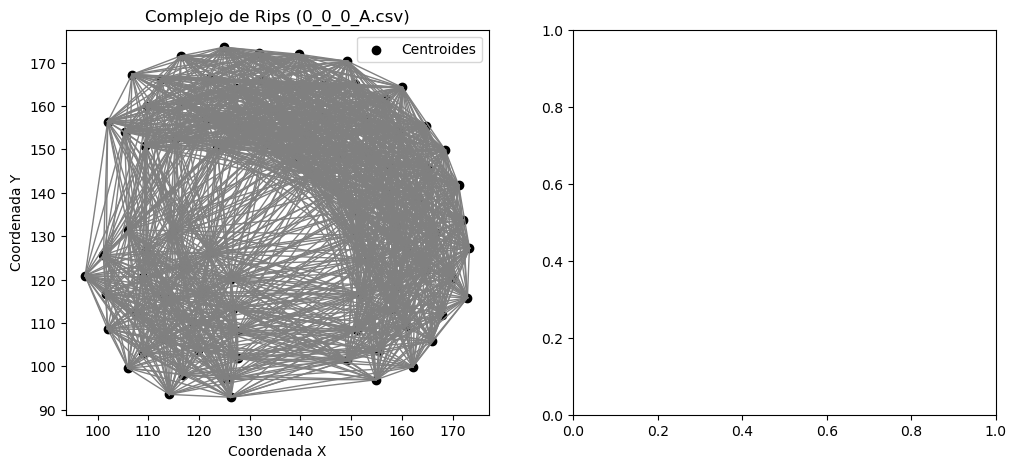

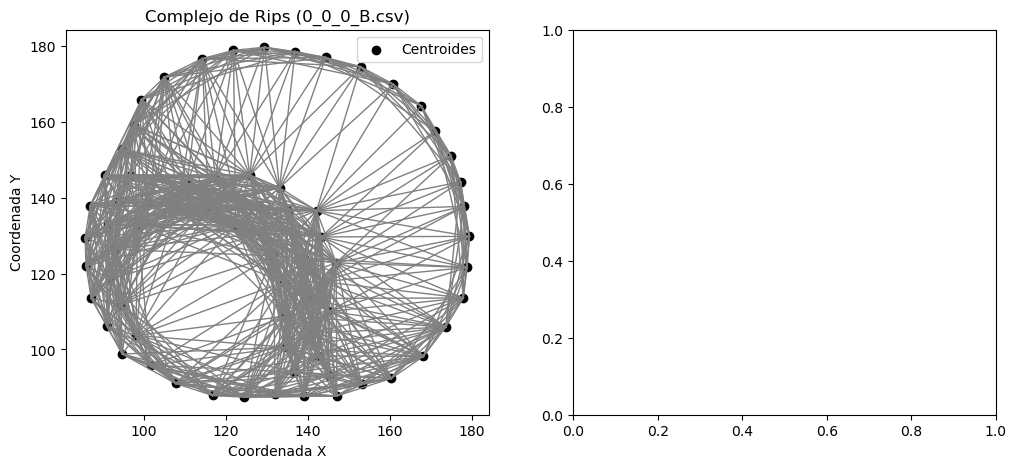

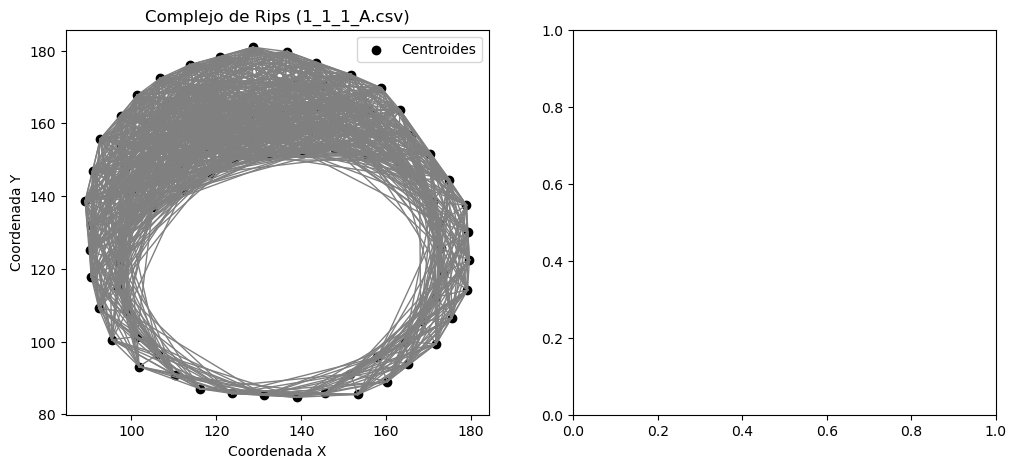

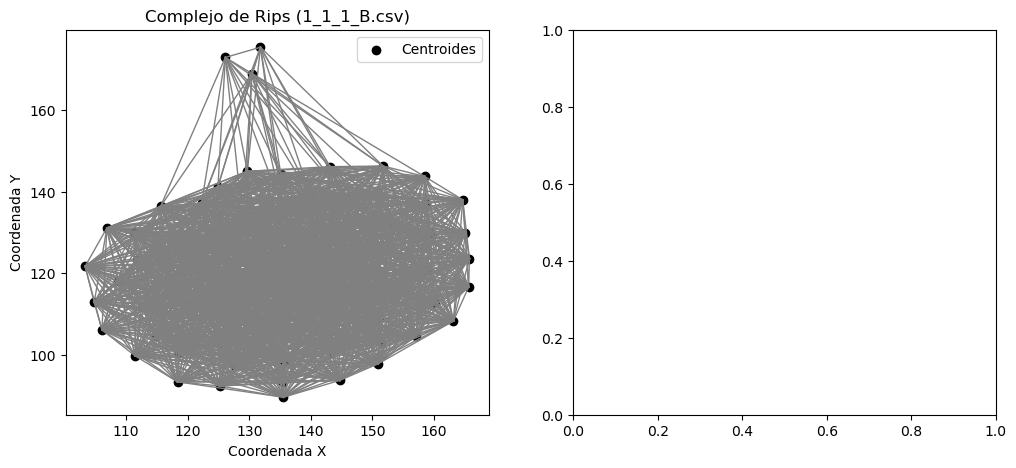

In [52]:
ejecutar_pipeline("/home/jupyter-user5/multicellularity_patterns_classification-/corte3/carpeta_csv")

In [54]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

def aplicar_dbscan_a_distancias(input_folder, eps=1.0, min_samples=5):
    # Crear la carpeta de salida en la misma dirección que la carpeta de entrada
    output_folder = os.path.join(input_folder, "resultados_cluster")
    os.makedirs(output_folder, exist_ok=True)

    # Inicializar una lista para almacenar todos los resultados
    todos_resultados = []

    # Iterar sobre todos los archivos CSV en la carpeta de entrada
    for filename in os.listdir(input_folder):
        if filename.endswith(".csv"):
            input_file = os.path.join(input_folder, filename)
            
            # Cargar la matriz de distancias
            df = pd.read_csv(input_file, index_col=0)
            distancias = df.values

            # Escalar los datos para mejorar el rendimiento de DBSCAN
            scaler = StandardScaler()
            distancias_scaled = scaler.fit_transform(distancias)

            # Aplicar DBSCAN
            dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="euclidean")
            labels = dbscan.fit_predict(distancias_scaled)

            # Número de clusters encontrados
            num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            print(f"Número de clústeres encontrados en {filename}: {num_clusters}")

            # Guardar los resultados en una lista
            resultados = pd.DataFrame({'Archivo': df.index, 'Cluster': labels})
            resultados['NombreArchivo'] = filename  # Agregar el nombre del archivo
            todos_resultados.append(resultados)

            # Graficar los clusters encontrados
            plt.figure(figsize=(10, 8))
            unique_labels = set(labels)
            
            for k in unique_labels:
                class_member_mask = (labels == k)
                xy = distancias[class_member_mask]
                plt.plot(np.where(class_member_mask)[0], distancias[class_member_mask, class_member_mask], 
                         'o', markerfacecolor='black' if k == -1 else plt.cm.Spectral(float(k) / num_clusters))
            
            plt.title(f"Clustering DBSCAN para {filename}")
            plt.xlabel("Índice")
            plt.ylabel("Distancia")
            plt.savefig(os.path.join(output_folder, f"grafico_clusters_{filename}.png"))
            plt.close()  # Cerrar la figura para liberar memoria

    # Concatenar todos los resultados en un solo DataFrame
    resultados_finales = pd.concat(todos_resultados, ignore_index=True)
    output_file_final = os.path.join(output_folder, "todos_resultados_clusters.csv")
    resultados_finales.to_csv(output_file_final, index=False)

    print(f"Resultados completos guardados en: {output_file_final}")

In [62]:
# Llama a la función pasando el directorio que contiene los archivos CSV y tus parámetros
aplicar_dbscan_a_distancias(
    input_folder="/home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides_tipo/persistencia/distancias_por_tipo/",
    eps=2,  
    min_samples=2
)


Número de clústeres encontrados en distancias_bottleneck_dim1_B.csv: 3
Número de clústeres encontrados en distancias_wasserstein_dim1_A.csv: 2
Número de clústeres encontrados en distancias_wasserstein_dim1_B.csv: 2
Número de clústeres encontrados en distancias_bottleneck_dim0_B.csv: 2
Número de clústeres encontrados en distancias_wasserstein_dim0_A.csv: 2
Número de clústeres encontrados en distancias_wasserstein_dim0_B.csv: 2
Número de clústeres encontrados en distancias_bottleneck_dim0_A.csv: 1
Número de clústeres encontrados en distancias_bottleneck_dim1_A.csv: 1
Resultados completos guardados en: /home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides_tipo/persistencia/distancias_por_tipo/resultados_cluster/todos_resultados_clusters.csv


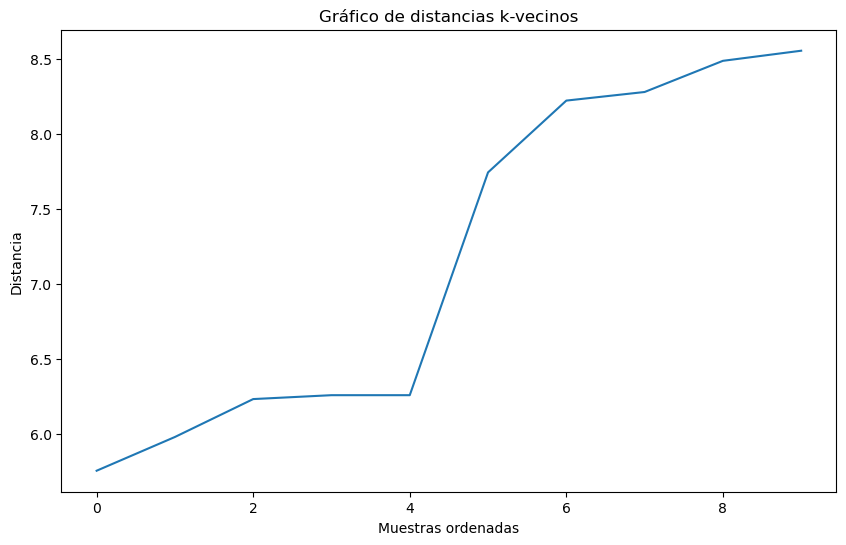

In [60]:
from sklearn.neighbors import NearestNeighbors

def calcular_k_distancias(input_file, k=5):
    df = pd.read_csv(input_file, index_col=0)
    distancias = df.values
    
    nbrs = NearestNeighbors(n_neighbors=k).fit(distancias)
    distancias_k, _ = nbrs.kneighbors(distancias)
    distancias_k = np.sort(distancias_k[:, k-1], axis=0)

    plt.figure(figsize=(10, 6))
    plt.plot(distancias_k)
    plt.title(f'Gráfico de distancias k-vecinos')
    plt.xlabel('Muestras ordenadas')
    plt.ylabel('Distancia')
    plt.show()

# Llama a esta función para ver el gráfico de distancias
calcular_k_distancias(
    input_file="/home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides_tipo/persistencia/distancias_por_tipo/distancias_bottleneck_dim0_A.csv"
)


In [67]:
import os
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def aplicar_dbscan_conjuntamente(input_folder, eps=1.0, min_samples=5):
    # Crear la carpeta de salida en la misma dirección que la carpeta de entrada
    output_folder = os.path.join(input_folder, "resultados_cluster_conjunto")
    os.makedirs(output_folder, exist_ok=True)

    # Lista para almacenar los DataFrames de distancias
    dataframes = []
    
    # Iterar sobre los archivos en la carpeta de entrada
    for filename in os.listdir(input_folder):
        if filename.endswith(".csv"):
            input_file = os.path.join(input_folder, filename)
            df = pd.read_csv(input_file, index_col=0)
            dataframes.append(df)

    # Combinar las matrices de distancias
    distancias_conjunto = pd.concat(dataframes, axis=0).reset_index(drop=True)
    
    # Escalar los datos
    scaler = StandardScaler()
    distancias_scaled = scaler.fit_transform(distancias_conjunto)

    # Aplicar DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="euclidean")
    labels = dbscan.fit_predict(distancias_scaled)

    # Guardar resultados
    resultados = pd.DataFrame({'Archivo': distancias_conjunto.index, 'Cluster': labels})
    output_file_final = os.path.join(output_folder, "resultados_clusters_conjunto.csv")
    resultados.to_csv(output_file_final, index=False)

    # Graficar los clusters
    plt.figure(figsize=(10, 8))
    unique_labels = set(labels)
    
    for k in unique_labels:
        class_member_mask = (labels == k)
        xy = distancias_conjunto[class_member_mask]
        plt.plot(np.where(class_member_mask)[0], distancias_conjunto[class_member_mask], 
                 'o', markerfacecolor='black' if k == -1 else plt.cm.Spectral(float(k) / len(unique_labels)))
    
    plt.title("Clustering DBSCAN Conjunto de Tipos de Células")
    plt.xlabel("Índice")
    plt.ylabel("Distancia")
    plt.savefig(os.path.join(output_folder, "grafico_clusters_conjunto.png"))
    plt.close()  # Cerrar la figura para liberar memoria

# Llama a la función pasando el directorio que contiene los archivos CSV y tus parámetros
aplicar_dbscan_conjuntamente(
    input_folder="/home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides_tipo/persistencia/distancias_por_tipo/wasser/",
    eps=2,  
    min_samples=5  
)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [69]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN

# Definir la ruta de la carpeta que contiene los archivos
input_folder = "/home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides_tipo/persistencia/distancias_por_tipo/wasser/"

# Cargar las matrices de distancias desde los archivos CSV
distancias_A = pd.read_csv(input_folder + "distancias_wasserstein_dim1_A.csv", index_col=0)
distancias_B = pd.read_csv(input_folder + "distancias_wasserstein_dim1_B.csv", index_col=0)

# Asegurarse de que los índices estén alineados correctamente
# Esto puede requerir un reindexado para evitar errores
distancias_A.index = [f"{i}_A" for i in distancias_A.index]
distancias_B.index = [f"{i}_B" for i in distancias_B.index]

# Combinar las matrices
# Crear una nueva matriz de distancias
distancias_combined = pd.concat([distancias_A, distancias_B], axis=0)

# Actualizar los nombres de las columnas para incluir el tipo
distancias_combined.columns = [f"{i}_A" for i in distancias_A.index] + [f"{i}_B" for i in distancias_B.index]

# Verificar la forma de la matriz combinada
print("Matriz de distancias combinada:")
print(distancias_combined)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=5, min_samples=3)  # Ajusta eps y min_samples según tu necesidad
labels = dbscan.fit_predict(distancias_combined)

# Agregar etiquetas al DataFrame
distancias_combined['cluster'] = labels

# Mostrar resultados
print("Etiquetas de clúster:")
print(distancias_combined[['cluster']])


Matriz de distancias combinada:
                -9_0_0_A.csv_A_A  9_0_0_A.csv_A_A  7_0_0_A.csv_A_A  \
-9_0_0_A.csv_A          0.000000        29.199927        32.990070   
9_0_0_A.csv_A          29.199927         0.000000        16.273319   
7_0_0_A.csv_A          32.990070        16.273319         0.000000   
5_0_0_A.csv_A          35.000114        34.866202        35.332056   
1_0_0_A.csv_A          38.330536        17.239839        20.933707   
-5_0_0_A.csv_A          8.814883        34.644313        38.576534   
3_0_0_A.csv_A          40.491659        19.351107        23.295610   
-1_0_0_A.csv_A         13.971769        42.469755        46.477323   
-7_0_0_A.csv_A          5.665495        34.163481        38.209574   
-3_0_0_A.csv_A          5.976949        34.572245        38.780554   
-5_0_0_B.csv_B               NaN              NaN              NaN   
-1_0_0_B.csv_B               NaN              NaN              NaN   
7_0_0_B.csv_B                NaN              NaN         

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').